# Исследование мировой киноиндустрии 1980-2020 гг.

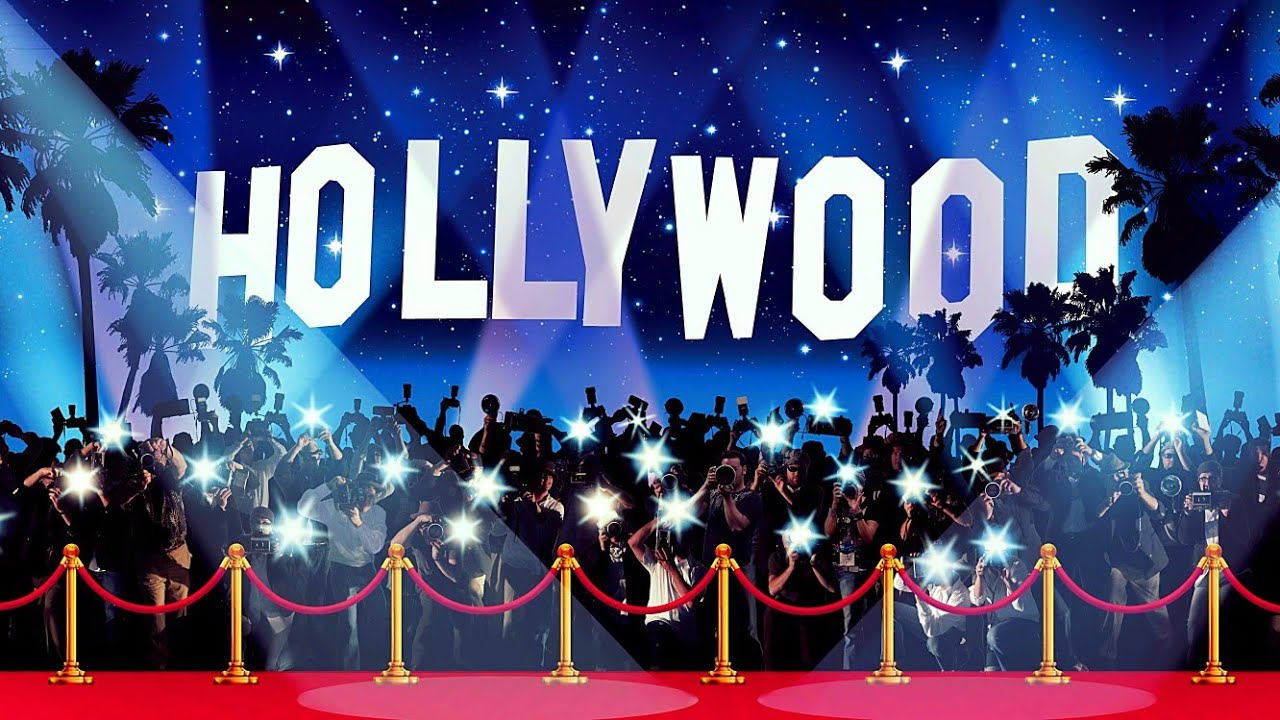

**Введение**

В датасете представлен набор данных из 7668 фильмов с 1980 по 2020 гг. 

Мы изучим данные, проанализируем доходы фильмов и студий, их окупаемость, выявим самые прибыльные жанры, выясним, как зависят кассовые сборы фильма от оценки рейтинга IMDB и от других показателей.

In [6]:
# загрузим все необходимые для работы библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')



In [5]:
# загрузим файл

from google.colab import files

data = files.upload()

Saving movies.csv to movies.csv


## Предобработка данных

In [7]:
# загрузим датафрейм и изучим информацию о нем

df = pd.read_csv('movies.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Всего в датафрейме 7668 строк. 

Столбцы  rating, released, score,votes, writer, star, country,budget, gross, company, runtime имеют пропуски.

In [9]:
# выведем информацию о пропусках

pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
rating,1.000000
genre,0.000000
year,0.000000
released,0.000000
score,0.000000
votes,0.000000
director,0.000000
writer,0.000000
star,0.000000


Больше всего пропусков в столбце budget. Остальные столбцы имеют незначительное число пропусков.

Проверим датафрейм на явные дубликаты.

In [10]:
df.duplicated().sum()



0

Дубликатов в датафрейме не обнаружено.

In [11]:
# изучим уникальные названия столбцов

df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [12]:
#изучим значения столбеца rating 

df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

Избавимся от неявных дубликатов в столбце rating, таких как Unrated и Not rated.

Заменим пропуски значением No rating

In [13]:
df['rating'] = df['rating'].replace('Unrated', 'No rating') 
df['rating'] = df['rating'].replace('Not Rated', 'No rating') 
df['rating'] = df['rating'].replace('no rating', 'No rating') 

df['rating'].value_counts()

R            3697
PG-13        2112
PG           1252
No rating     335
G             153
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

Изменим тип данных в столбцах gross, budget, runtime и votes.

In [14]:
df['gross'] = df['gross'].astype('Int64')
df['budget'] = df['budget'].astype('Int64')
df['runtime'] = df['runtime'].astype('Int64')
df['votes'] = df['votes'].astype('Int64')


In [15]:
# заменим пропуски в столбце runtime на 0

df['runtime'] = df['runtime'].fillna(0)


In [16]:
# заменим пропуски в столбце gross на 0

df['gross'] = df['gross'].fillna(0)

## Исследовательский анализ данных

### Кассовые сборы

In [17]:
# изучим описательную статистику столбца gross

df[df['gross']>0]['gross'].describe()

count    7.479000e+03
mean     7.850054e+07
std      1.657251e+08
min      3.090000e+02
25%      4.532056e+06
50%      2.020576e+07
75%      7.601669e+07
max      2.847246e+09
Name: gross, dtype: float64

Средний показатель продаж - 78  млн долл.
Медиана продаж - 20 млн. долл.

Такая разница междый средним и медианой говорит о большом количество аномальных показателей. 

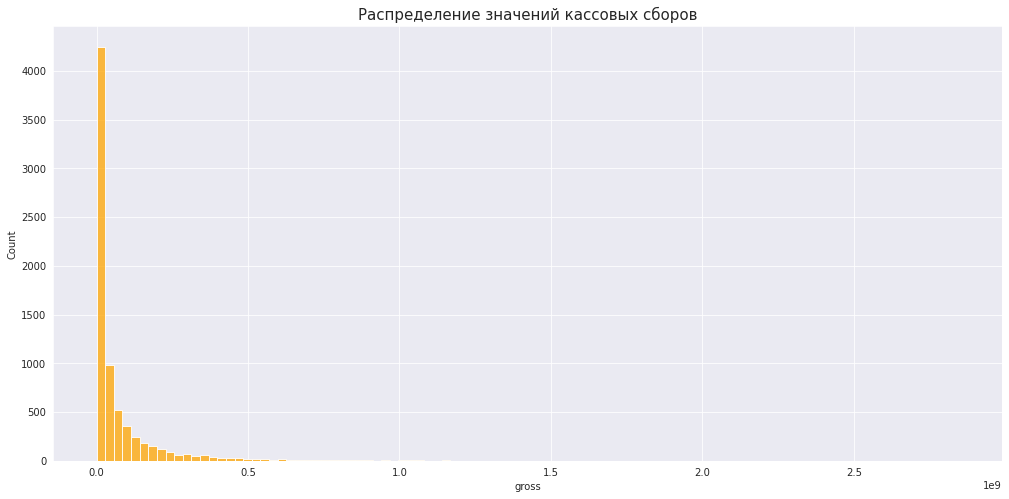

In [18]:
# построим гистограмму кассовых сборов

plt.figure(figsize = (17,8))
sns.histplot(df[df['gross']>0]['gross'], bins=100, color='orange')
plt.title('Распределение значений кассовых сборов', fontsize=15)
plt.show()

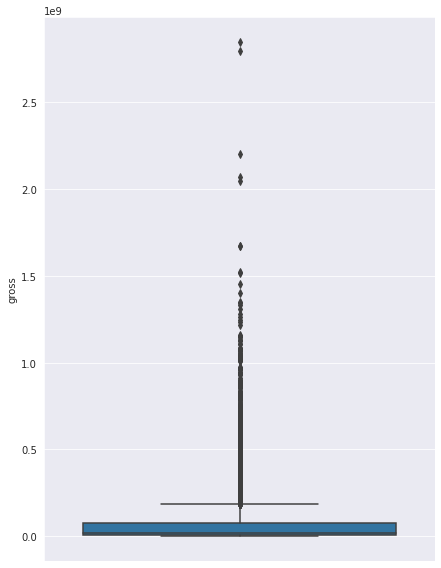

In [19]:
# построим "ящик с усами", чтобы изучить распределение данных по кассовым сборам
plt.figure(figsize=(7,10))
sns.boxplot(y='gross', data=df[df['gross']>0])
plt.show()

В столбце кассовых сборов много выбросов, что свидетельсвует о наличии большого числа блокбастеров, чьи продажи превосходят все остальные тайтлы.


In [20]:
# выведем топ-15 самых кассовых фильмов за весь период датафрейма

df_top_movies = df.sort_values(by='gross', ascending=False).head(15)
df_top_movies = df_top_movies[['name', 'year', 'genre', 'gross']].reset_index(drop=True)
df_top_movies

,name,year,genre,gross
0,Avatar,2009,Action,2847246203
1,Avengers: Endgame,2019,Action,2797501328
2,Titanic,1997,Drama,2201647264
3,Star Wars: Episode VII - The Force Awakens,2015,Action,2069521700
4,Avengers: Infinity War,2018,Action,2048359754
5,The Lion King,2019,Animation,1670727580
6,Jurassic World,2015,Action,1670516444
7,The Avengers,2012,Action,1518815515
8,Furious 7,2015,Action,1515341399
9,Frozen II,2019,Animation,1450026933


Лидер рейтинга - "Аватар" с общим доходом в 2,8 млрд долл.
На втором месте - "Мстители". Их сборы составили 2,7 млрд долл.
На третьем месте - "Титаник". Его доход составил 2,2 млрд долл.

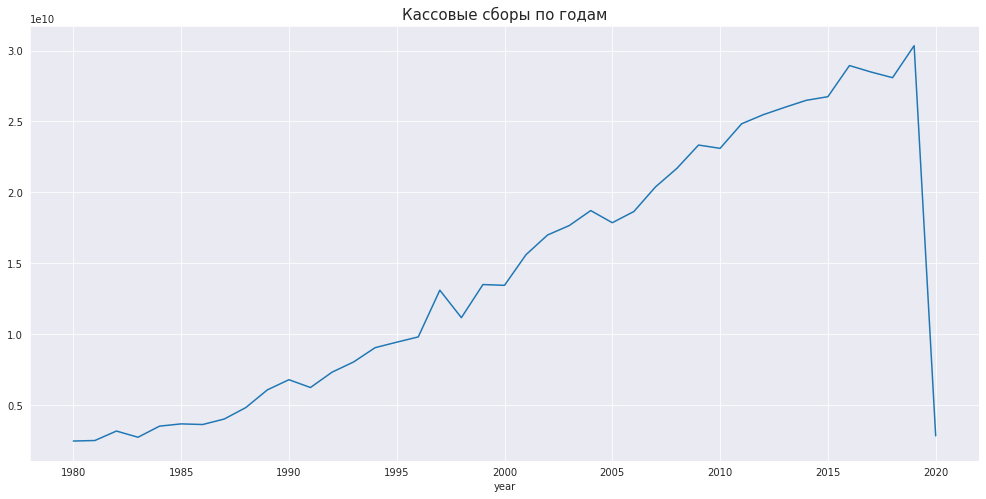

In [21]:
#построим график кассовых сборов по годам за период 1980-2020

df.groupby('year')['gross'].sum().plot(grid=True, figsize=(17,8))
plt.title('Кассовые сборы по годам', fontsize=15)
plt.show()


Кассовые сборы фильмов стабильно растут на протяжении всего периода. В 2020 они обваливаются по причине мирового локдауна, связанного с пандемией коронавируса.

По всему миру были закрыты кинотеатры, были отменены или отложены кинофестивали, а выпуски фильмов перенесены на будущие даты или на неопределённый срок.

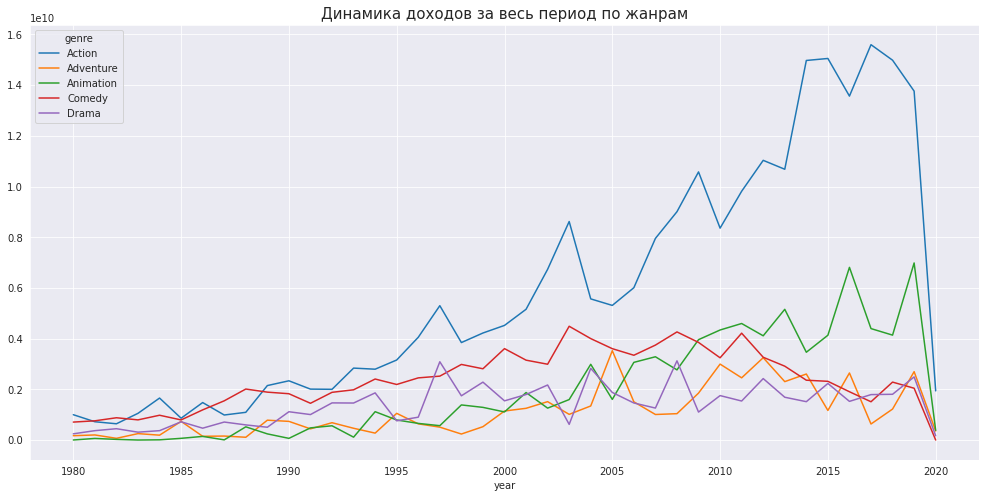

In [22]:
# cгруппируем данные по годам и доходам в разбивке по топ-5 самым прибыльным жанрам за весь период

df_gross_genre = df.groupby('genre')['gross'].sum().sort_values(ascending=False).head()

df_top_genre = df.query('genre in @df_gross_genre.index').pivot_table(index='year', columns='genre', values='gross', aggfunc='sum')
df_top_genre.plot(figsize=(17,8), grid=True)
plt.title('Динамика доходов за весь период по жанрам', fontsize=15)
plt.show()


In [23]:
#построим сводную таблицу самых прибыльных жанров с 2015 года

df_gross_top = df.loc[df['gross'] > 1].groupby('genre', as_index = False).agg({'gross':sum}).sort_values(by='gross', ascending=False)
df_gross_top['share, %'] = round((df_gross_top['gross'] / df_gross_top['gross'].sum())*100,2)
df_gross_top

,genre,gross,"share, %"
0,Action,243435855754,41.46
4,Comedy,97175468462,16.55
2,Animation,80142045796,13.65
6,Drama,57150648537,9.73
1,Adventure,45916596693,7.82
5,Crime,21355448322,3.64
3,Biography,20729581801,3.53
9,Horror,14543329602,2.48
7,Family,2157897417,0.37
12,Mystery,2023670554,0.34


Самый прибыльный жанр - Action. Его доля составляет 41 % от общих доходов всего периода. На втором месте - Comedy. Его доля - 16%. Третье место за анимацией - 13 % сборов с 1980 года.

In [24]:
# посмотрим, какие фильмы были самыми прибыльными, в разбивке по годам

df_titles_by_year = df.groupby(['year', 'name'], as_index=False).agg({'gross':'max'})

df_titles_by_year = df_titles_by_year.sort_values(by=['year', 'gross'], ascending=False)


df_titles_by_year = df_titles_by_year.groupby('year').agg({'name':'first', 'gross':'first'}).sort_values(by='year', ascending=False)

df_titles_by_year.style.bar(color='blue')


,name,gross
year,,
2020,The Eight Hundred,461421559
2019,Avengers: Endgame,2797501328
2018,Avengers: Infinity War,2048359754
2017,Star Wars: Episode VIII - The Last Jedi,1332698830
2016,Captain America: Civil War,1153337496
2015,Star Wars: Episode VII - The Force Awakens,2069521700
2014,Transformers: Age of Extinction,1104054072
2013,Frozen,1281508100
2012,The Avengers,1518815515


### Бюджет

In [25]:
#составим рейтинг топ-15 фильмов по бюджету на производство за весь период

df_films_budget = df.sort_values(by='budget',ascending=False).head(15).reset_index()
df_films_budget  = df_films_budget[['name', 'year', 'country', 'budget']] 
df_films_budget

,name,year,country,budget
0,Avengers: Endgame,2019,United States,356000000
1,Avengers: Infinity War,2018,United States,321000000
2,Star Wars: Episode VIII - The Last Jedi,2017,United States,317000000
3,Justice League,2017,United States,300000000
4,Pirates of the Caribbean: at World's End,2007,United States,300000000
5,Star Wars: Episode IX - The Rise of Skywalker,2019,United States,275000000
6,Solo: A Star Wars Story,2018,United States,275000000
7,Superman Returns,2006,United States,270000000
8,Tangled,2010,United States,260000000
9,The Lion King,2019,United States,260000000


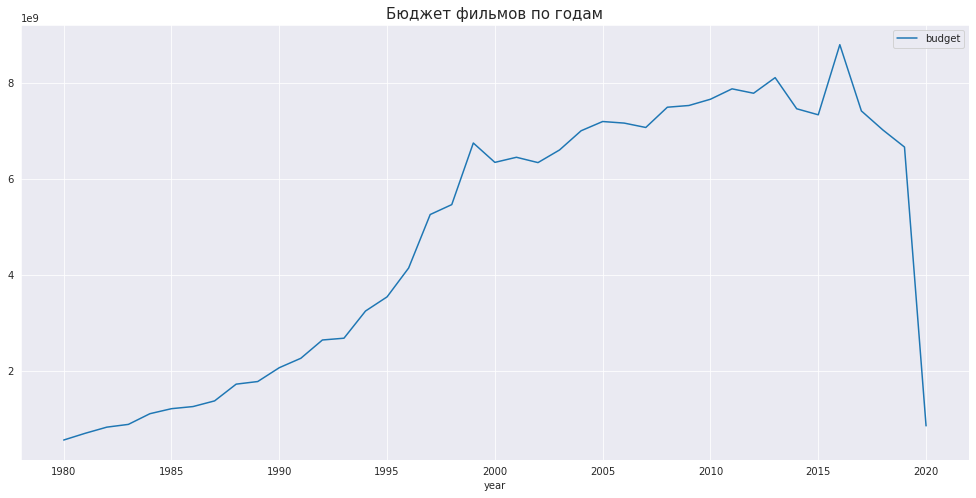

In [26]:
#построим график бюджета по годам за период 1980-2020


df_gross = df.groupby('year')['budget'].sum().plot(grid=True, figsize=(17,8), legend=True)
plt.title('Бюджет фильмов по годам', fontsize=15)
plt.show()

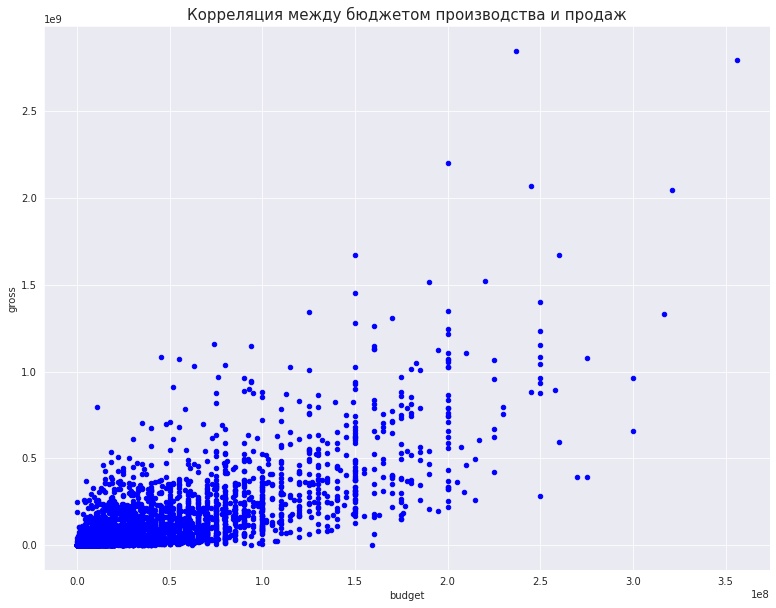

In [27]:
#построим диаграмму рассеяния для бюджета производства и продаж 

df.plot(x='budget', y='gross', kind='scatter', color='blue', figsize=(13,10))
plt.title('Корреляция между бюджетом производства и продаж', fontsize=15)
plt.show()

In [28]:
# построим таблицу корреляций для всего датафрейма

df.corr().style.background_gradient('RdYlGn')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.261900,0.116358
score,0.097995,1.000000,0.409182,0.076254,0.186392,0.398387
votes,0.222945,0.409182,1.000000,0.442429,0.632834,0.307074
budget,0.329321,0.076254,0.442429,1.000000,0.741241,0.319190
gross,0.261900,0.186392,0.632834,0.741241,1.000000,0.244339
runtime,0.116358,0.398387,0.307074,0.319190,0.244339,1.000000


Отметим относительно высокую корреляцию между кассовыми сборами фильмов и их бюджетом.

Остальных заметных корреляций не выявлено.

### Кассовые сборы

Топ фильмов по кассовым сборам

In [29]:
#составим рейтинг топ-15 фильмов по кассовым сборам за весь период

df_films_gross = df.sort_values(by='gross',ascending=False).head(15).reset_index()
df_films_gross  = df_films_gross[['name', 'released', 'gross']]

df_films_gross 

,name,released,gross
0,Avatar,"December 18, 2009 (United States)",2847246203
1,Avengers: Endgame,"April 26, 2019 (United States)",2797501328
2,Titanic,"December 19, 1997 (United States)",2201647264
3,Star Wars: Episode VII - The Force Awakens,"December 18, 2015 (United States)",2069521700
4,Avengers: Infinity War,"April 27, 2018 (United States)",2048359754
5,The Lion King,"July 19, 2019 (United States)",1670727580
6,Jurassic World,"June 12, 2015 (United States)",1670516444
7,The Avengers,"May 4, 2012 (United States)",1518815515
8,Furious 7,"April 3, 2015 (United States)",1515341399
9,Frozen II,"November 22, 2019 (United States)",1450026933


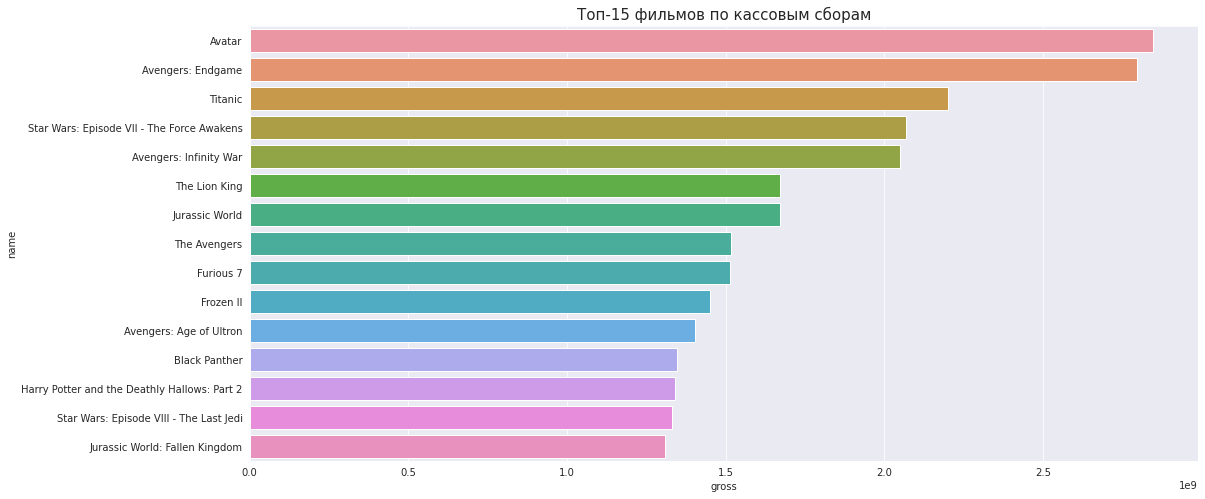

In [30]:
# построим столбчатую диаграмму топ-15 фильмов по доходу 

plt.figure(figsize=(17,8))
sns.barplot(x=df_films_gross['gross'], y=df_films_gross['name'])
plt.title('Топ-15 фильмов по кассовым сборам', fontsize=15)
plt.show()

Самый прибыльный фильм за период с 1980 по 2020 гг. - "Аватар".

На втором месте - "Мстители: Финал".

Замыкает тройку лидеров - "Титаник".

In [31]:
# выведем топ-10 наименее прибыльных фильмов

df_gr = df.loc[df['gross'] > 0].sort_values(by='gross').reset_index().head(10)
df_gr = df_gr[['name', 'year', 'country','gross']]
df_gr

,name,year,country,gross
0,Trojan War,1997,United States,309
1,Madadayo,1993,Japan,596
2,Run with the Hunted,2019,United States,682
3,The Untold Story,2019,United States,790
4,"Love, Honor and Obey",2000,United Kingdom,1400
5,Pusher,1996,Denmark,1605
6,I Want You,1998,United Kingdom,1672
7,Now & Later,2009,United States,1808
8,Angels Crest,2011,Canada,2037
9,Parasite,1982,United States,2270


### Окупаемость фильмов

In [53]:
# создадим новый датафрейм и удалим строки с пропущенными значениями в столбцах budget и gross

df_roi = df[df['gross']>0]
df_roi = df_roi.dropna(subset=['gross','budget']).reset_index()

Расчет окупаемости проведем так: 
- Разделим прибыль на бюджет фильма и умножим на 100. 

Получится показатель отношения прибыли к бюджету в процентах. Фильм становится прибыльным, если показатель превышает 100%.

In [54]:
# создадим столбец roi с отношением кассовых сборов к бюджету фильма

df_roi['roi,%'] = round((df_roi['gross'] / df_roi['budget'])*100,3)


In [55]:
# выведем на экран топ-15 по прибыли относительно затраченных на производство средств

df_roi_top = df_roi.sort_values('roi,%',ascending=False)
df_roi_top[['name','genre','year', 'country', 'budget','gross','roi,%']].head(15).reset_index(drop=True)

,name,genre,year,country,budget,gross,"roi,%"
0,Paranormal Activity,Horror,2007,United States,15000,193355800,1289038.667
1,The Blair Witch Project,Horror,1999,United States,60000,248639099,414398.498
2,The Gallows,Horror,2015,United States,100000,42964410,42964.41
3,El Mariachi,Action,1992,Mexico,7000,2040920,29156.0
4,Once,Drama,2007,Ireland,150000,20936722,13957.815
5,Clerks,Comedy,1994,United States,27000,3151130,11670.852
6,Napoleon Dynamite,Comedy,2004,United States,400000,46138887,11534.722
7,In the Company of Men,Comedy,1997,Canada,25000,2804473,11217.892
8,Keeping Mum,Comedy,2005,United Kingdom,169000,18586834,10998.127
9,Open Water,Adventure,2003,United States,500000,54683487,10936.697


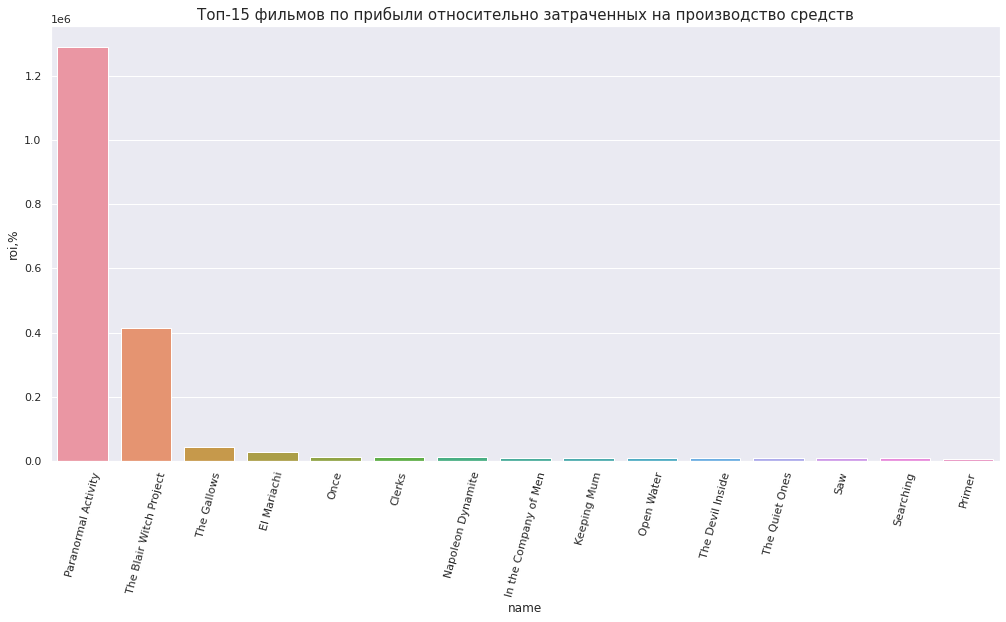

In [56]:
# построим диаграмму топ-15 фильмов, ставших самыми прибыльными относительно затраченных на производство средств

plt.figure(figsize=(17,8))
sns.barplot(x='name', y='roi,%', data=df_roi_top.head(15))
plt.title('Топ-15 фильмов по прибыли относительно затраченных на производство средств', fontsize=15)
plt.xticks(rotation = 75)
plt.show()


 - Самым прибыльным фильмом относительно вложенных средств за период с 1980 по 2020 гг. стал фильм "Паранормальное явление" ("Paranormal Activity") 2007 года выпуска. Его производство обошлось в 15 тыс. долл., при этом прибыль составила более 193,3 млн долл. 

 - Вторым по доле прибыли относительно бюджета стал фильм "Ведьма из Блэр"("The Blair Witch Project") 1999 года. Стоимость его производства - 60 тыс. долл, прибыль - 248,6 млн долл.

- Третьим фильмом по окупаемости вложенных средств стал фильм "Виселица" ("The Gallows") 2015 года выпуска. Его прозводство обошлось в 100 тыс. долл., кассовые сборы составили 42,9 млн долл.


In [57]:
# выведем на экран топ-15 по самым убыточным фильмам относительно затраченных на производство средств

df_roi_toploses = df_roi.sort_values('roi,%',ascending=True)
df_roi_toploses[['name','genre','year', 'country', 'budget','gross','roi,%']].head(15).reset_index(drop=True)

,name,genre,year,country,budget,gross,"roi,%"
0,Trojan War,Comedy,1997,United States,15000000,309,0.002
1,Madadayo,Drama,1993,Japan,11900000,596,0.005
2,Ginger Snaps,Drama,2000,Canada,5000000,2554,0.051
3,Philadelphia Experiment II,Action,1993,United States,5000000,2970,0.059
4,The Lovers on the Bridge,Drama,1991,France,28000000,29679,0.106
5,Savior,Drama,1998,United States,10000000,14328,0.143
6,Tanner Hall,Drama,2009,United States,3000000,5073,0.169
7,Crimewave,Comedy,1985,United States,3000000,5101,0.17
8,Deadfall,Crime,1993,United States,10000000,18369,0.184
9,Hell's Kitchen,Crime,1998,United States,6000000,11710,0.195


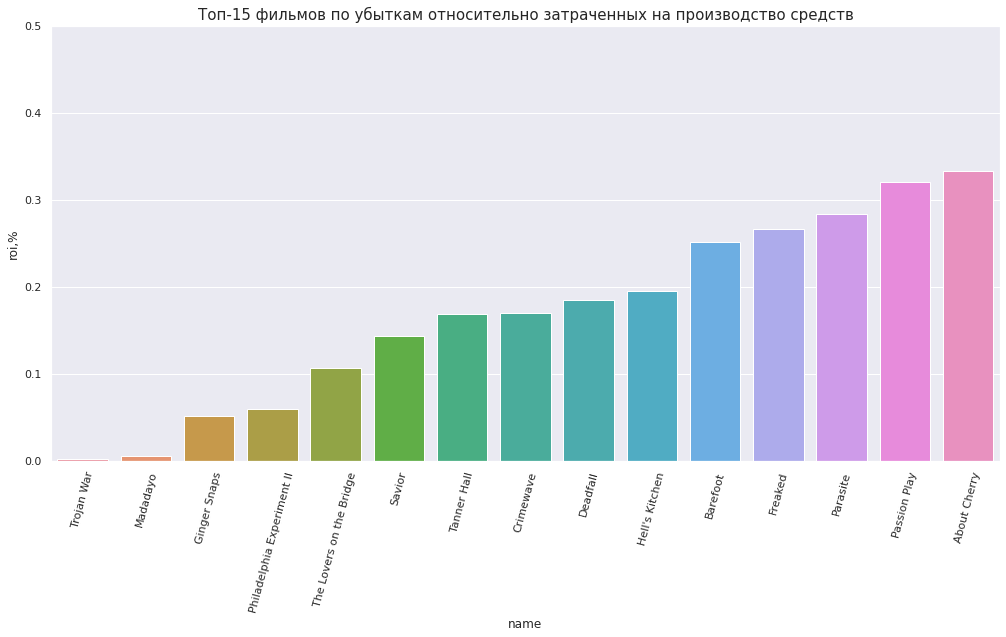

In [58]:
# построим диаграмму топ-15 фильмов, ставших самыми убыточными относительно затраченных на производство средств

plt.figure(figsize=(17,8))
sns.barplot(x='name', y='roi,%', data=df_roi_toploses.head(15))
plt.title('Топ-15 фильмов по убыткам относительно затраченных на производство средств', fontsize=15)
plt.ylim(0,0.5)
plt.xticks(rotation = 75)
plt.show()



 - Самым убыточным фильмом относительно бюджета производства стала комедия "Троянская штучка" ("Trojan War") 1997 года выпуска. Бюджет на его производство составил 15 млн долл., а собрать в кинотеатрах ему удалось всего 309 долл.
 - Вторым по проценту убытков стал японский фильм "Еще нет"("Madadayo") 1993 года. Затраты на его прозводство составили 11,9 млн долл., прибыль - 596 долл.
 - Замыкает тройку фильм "Оборотень" ("Ginger Snaps") 2000 года выпуска. Его бюджет - 5 млн долл., прибыль - 2554 долл.	


In [59]:
# сгруппируем данные по прибыли относительно убытка в разбивке по жанрам
# в каждом жанре должно быть представлено более 100 картин

df_roi_genre = df_roi.groupby('genre').agg({'name':'count','roi,%':'mean'}).sort_values('roi,%', ascending=False)
df_roi_genre.columns = ['count', 'roi,%']
df_roi_genre = df_roi_genre[df_roi_genre['count']>100].reset_index()

df_roi_genre

,genre,count,"roi,%"
0,Horror,254,7675.655339
1,Animation,278,399.152906
2,Drama,869,371.81043
3,Comedy,1496,363.661822
4,Adventure,327,312.830046
5,Action,1417,293.486893
6,Biography,312,271.224638
7,Crime,400,233.550135


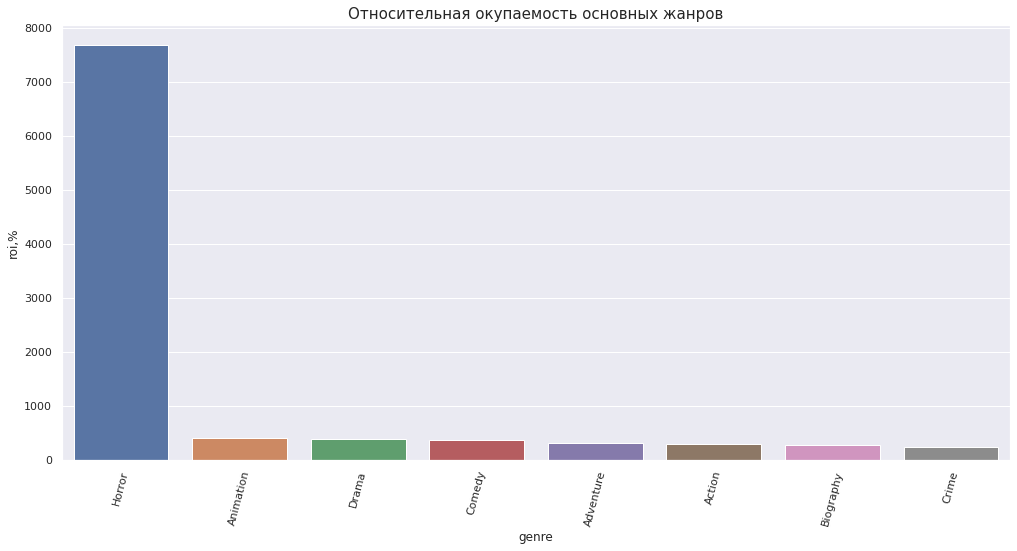

In [60]:
# построим диаграмму относительной окупаемости разных жанров

plt.figure(figsize=(17,8))
sns.barplot(x='genre', y='roi,%', data=df_roi_genre)
plt.title('Относительная окупаемость основных жанров', fontsize=15)
plt.xticks(rotation = 75)
plt.show()

Относительная окупаемость фильмов жанров Horror обогнала аналогичные показатели во много раз. Средний показатель окупаемости ужастиков из нашего датасета составил 7675%.

### Страны

In [32]:
# посчитаем число фильмов по странам

df_country_count = df.groupby('country').agg({'name':'count'}).sort_values(by='name', ascending=False).reset_index() 
df_country_count = df_country_count.rename(columns = {'name':'count_movies'})


df_country_count



,country,count_movies
0,United States,5475
1,United Kingdom,816
2,France,279
3,Canada,190
4,Germany,117
5,Australia,92
6,Japan,81
7,India,62
8,Italy,61
9,Spain,47


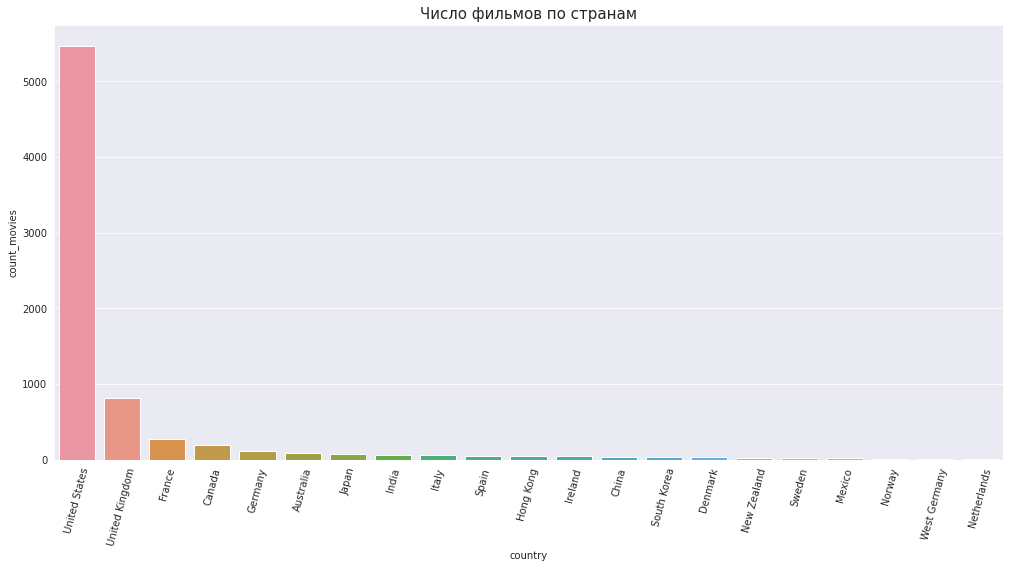

In [33]:
# построим график для по кол-ву фильмов по странам, снявших более 10 картин

df_country_count_10 = df_country_count[df_country_count['count_movies'] > 10]

plt.figure(figsize=(17,8))
sns.barplot(x = df_country_count_10['country'], y= df_country_count_10['count_movies'])
plt.xticks(rotation = 75)
plt.title('Число фильмов по странам', fontsize=15)
plt.show()

In [34]:
# cгруппируем страны по доходу от производства кино за весь период и выведем топ-15 на экран

df_country = df.groupby('country').agg({'gross':'sum'}).sort_values(by='gross', ascending=False).head(15).reset_index()
df_country

,country,gross
0,United States,483458762880
1,United Kingdom,48950197427
2,China,8789429801
3,France,8499480043
4,New Zealand,6354731946
5,Germany,6218590787
6,Canada,6075291696
7,Japan,3668029755
8,Australia,3008909112
9,Spain,1658676204


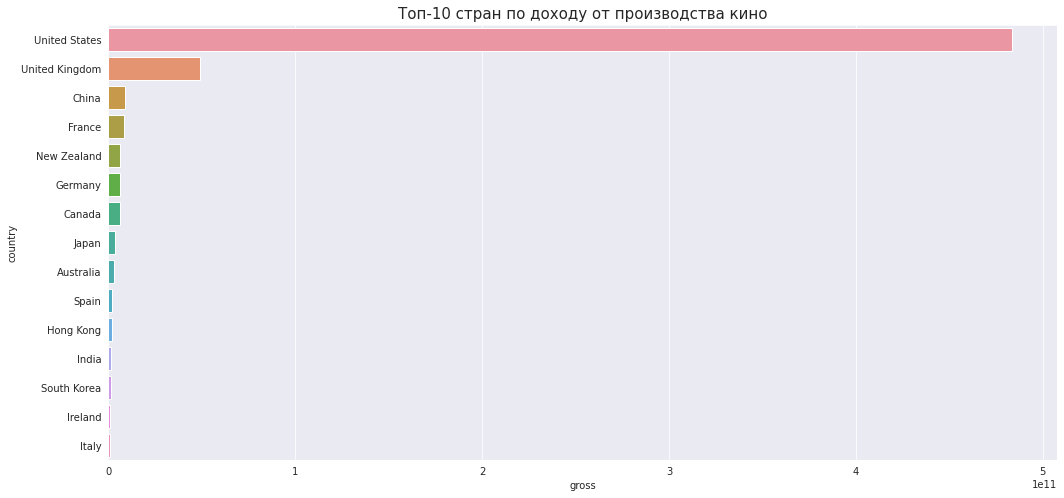

In [35]:
plt.figure(figsize=(17,8))
sns.barplot(x=df_country['gross'], y=df_country['country'])
plt.title('Топ-10 стран по доходу от производства кино', fontsize=15)
plt.show()

На первом месте рейтинга по доходу от производства кино - США. Далее идет Великобритания. Замыкает тройку лидеров Китай. 

Интересно, что в топ-5 попала Новая Зеландия. Это объясняется местной госполитикой и щедрой системой рибейтов: в случае съемок в этой стране кинематографистам возмещается до 25% расходов. В Новой Зеландии сняты такие блокбастеры, как трилогия «Властелин колец» и «Хоббит».


In [36]:
# выведем средний рейтинг IMDB фильмов производства Новой Зеландии

df[df['country'] == 'New Zealand']['score'].mean()


7.42

Средний рейтинг IMDB фильмов производства Новой Зеландии - 7.42 из 10. Это очень высокая оценка по меркам сайта.

### Студии

In [37]:
# cгруппируем данные по доходам каждой студии и выведем топ-10 компаний

df_studio_top = df.loc[df['gross'] > 0].groupby('company').agg({'gross':'sum'}).sort_values(by = 'gross', ascending =False)
df_studio_top['share, %'] = round((df_studio_top['gross'] / df_studio_top['gross'].sum())*100,2)

print('Всего студий в датафрейме:', len(df['company']))
df_studio_top = df_studio_top.head(10)
df_studio_top

Всего студий в датафрейме: 7668


,gross,"share, %"
company,,
Warner Bros.,56491421806,9.62
Universal Pictures,52514188890,8.95
Columbia Pictures,43008941346,7.33
Paramount Pictures,40493607415,6.9
Twentieth Century Fox,40257053857,6.86
Walt Disney Pictures,36327887792,6.19
New Line Cinema,19883797684,3.39
Marvel Studios,15065592411,2.57
DreamWorks Animation,11873612858,2.02


Среди доходов студий за весь период с 1980 года лидирует Warner Bros., которая собрала 56,4 млрд долл - почти 10% от дохода всех студий. На втором месте - Universal Pictures с доходом в 52,5 млрд долл. 

Отметим, что на рынке студий нет компаний, которые занимали бы существенную долю рынка. Всего в датафрейме 7668 студий, а лидер рейтинга занимает 10% рынка, из чего можно сделать вывод, что этот рынок является конкурентным. 

In [38]:
# изучим рынок студий за период с 2018 по 2020 гг.

df_studio_2018 = df.query('year > 2018') 
df_studio_top = df_studio_2018.loc[df['gross'] > 0].groupby('company').agg({'gross':'sum'}).sort_values(by = 'gross', ascending =False)
df_studio_top['share, %'] = round((df_studio_top['gross'] / df_studio_top['gross'].sum())*100,2)

print('Всего студий в датафрейме:', len(df['company']))
df_studio_top = df_studio_top.head(10)
df_studio_top



Всего студий в датафрейме: 7668


,gross,"share, %"
company,,
Walt Disney Pictures,5915082412,17.84
Columbia Pictures,3359262693,10.13
Warner Bros.,2816883596,8.49
Marvel Studios,2797501328,8.44
Walt Disney Animation Studios,1450026933,4.37
Pixar Animation Studios,1073394593,3.24
Paramount Pictures,980674597,2.96
Universal Pictures,978727945,2.95
New Line Cinema,845576249,2.55


In [39]:
#построим графики дохода по годам для студий из рейтинга топ-10


df_studio_dymamic = df.loc[df['gross'] > 0]

df_studio_dymamic = df_studio_dymamic.groupby(['company', 'year']).agg({'gross':'sum'}).sort_values(by = ['company','year'], ascending =False).reset_index()

df_studio_dymamic.to_excel('df_studio_dymamic.xlsx')



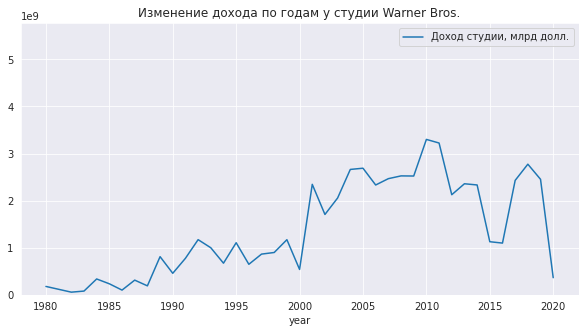

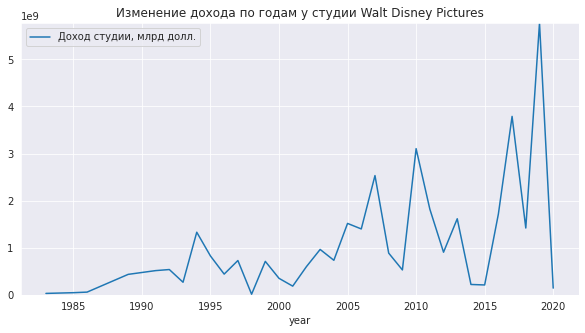

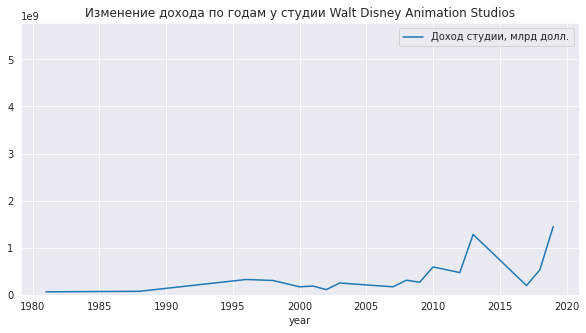

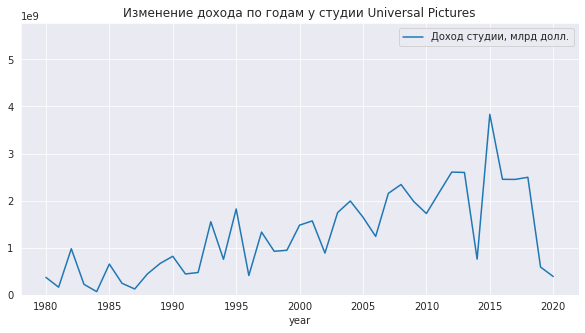

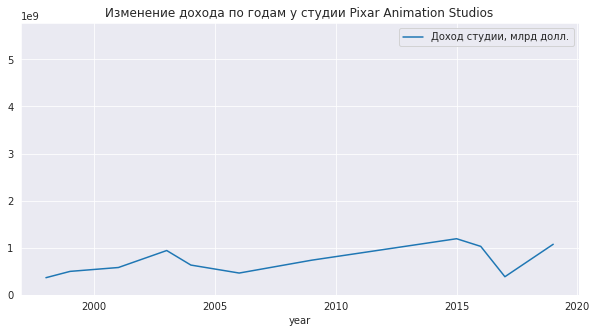

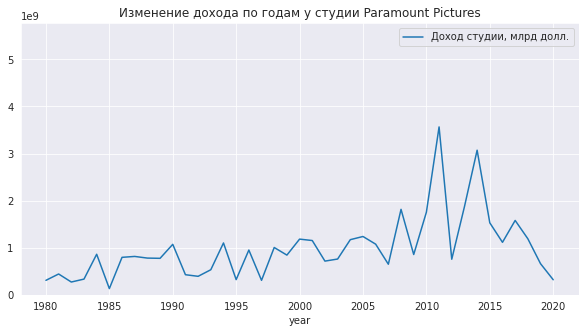

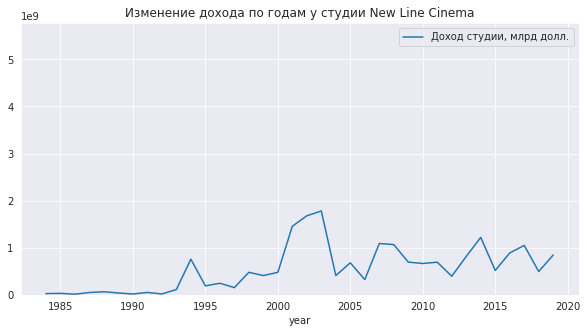

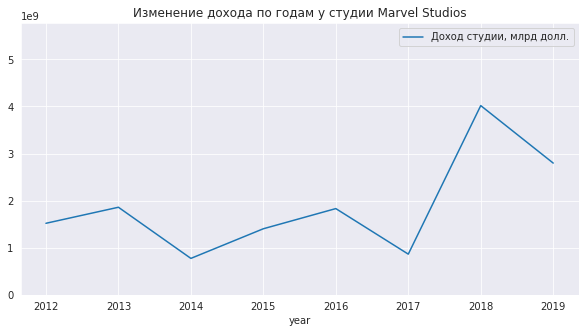

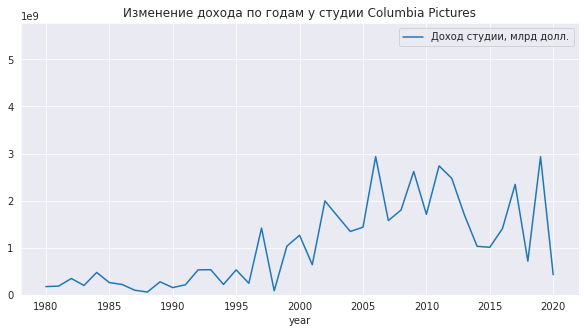

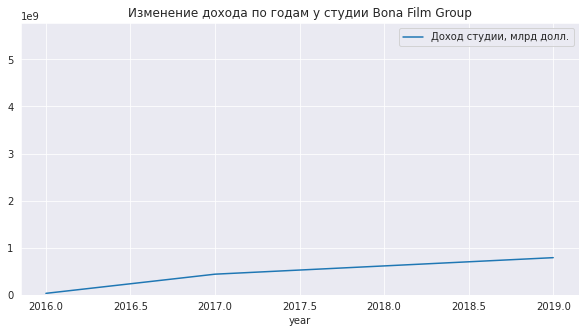

In [40]:
for name in df_studio_dymamic['company'].unique():
  if name in df_studio_top.index:
    df_studio_dymamic[df_studio_dymamic['company'] == name].plot(x='year', y='gross', grid=True, figsize=(10,5),label='Доход студии, млрд долл.')
    plt.ylim(0,df_studio_dymamic['gross'].max())
    plt.title(f'Изменение дохода по годам у студии {name}')

### Рейтинг IMDB

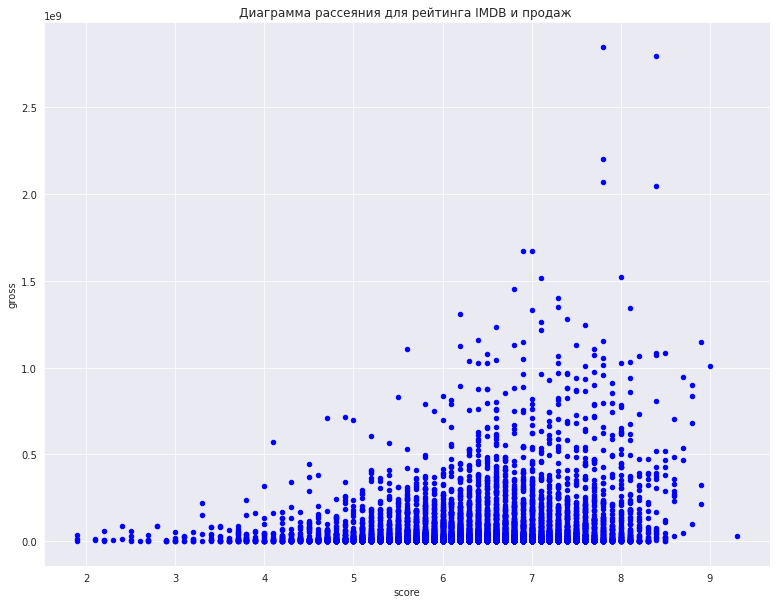

In [41]:
#построим диаграмму рассеяния для рейтинга IMDB и продаж 

df.plot(x='score', y='gross', kind='scatter', color='blue', figsize=(13,10))
plt.title('Диаграмма рассеяния для рейтинга IMDB и продаж ')
plt.show()



На диаграмме мы видим, что высокодоходных фильмов больше среди фильмов с высоким рейтингом.

In [42]:
# разобьем доход (gross) по категориям. 25%-му процентилю присвоим категорию "Низкий доход", 
# доходу, находящемуся в межквартильном размахе, присвоим категорию "Средний доход". Доходу, который превышает 75%-й процентиль - "Высокий доход". 

# вычислим процентили и присвоим им переменные
quantile_75 = df['gross'].quantile(q=0.75)
quantile_25 = df['gross'].quantile(q=0.25)


# напишем функцию
def categorize(row):
  gr = row['gross']
  if gr >= quantile_75:
    return 'Высокий доход'
  if (gr < quantile_75 ) & (gr >= quantile_25):
    return 'Средний доход'
  if (gr < quantile_25) & (gr > 0):
    return 'Низкий доход'
  else:
    return 'Нет информации о доходе'

df['gross_category'] = df.apply(categorize, axis=1)



In [43]:
# вычислим средние оценки IMDB для трех категорий

df_imdb = df.groupby('gross_category').agg({'score':'mean'}).sort_values(by='score', ascending=False)
df_imdb = df_imdb.rename(columns={'score': 'imdb'})
df_imdb

,imdb
gross_category,
Высокий доход,6.641836
Средний доход,6.319249
Низкий доход,6.305498
Нет информации о доходе,6.054839


Средние оценки для категорий фильмов по доходу практически не отличаются. Средняя оценка IMDB для фильмов с высоким доходом - 6.6, в то время как для низкодоходных - 6.3.

In [44]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gross_category
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,Средний доход
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,Средний доход
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,Высокий доход
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,Высокий доход
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,Средний доход


Найдем средние оценки IMDB для разных стран. У каждой страны в рэнкинге должно быть больше выпущено 10 фильмов.

In [45]:
df_country_imdb = df.groupby('country').agg({'name':'count','score':'mean'}).sort_values('score',ascending=False)
df_country_imdb = df_country_imdb.rename(columns={'name':'count_movies','score': 'imdb'})
df_country_imdb['imdb'] = round(df_country_imdb['imdb'],2) 
df_country_imdb = df_country_imdb[df_country_imdb['count_movies'] > 10].reset_index()
df_country_imdb


,country,count_movies,imdb
0,New Zealand,25,7.42
1,Sweden,25,7.33
2,India,62,7.24
3,Japan,81,7.22
4,West Germany,12,7.18
5,South Korea,35,7.16
6,Denmark,32,7.10
7,Spain,47,7.09
8,Norway,12,6.94
9,Ireland,43,6.93


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


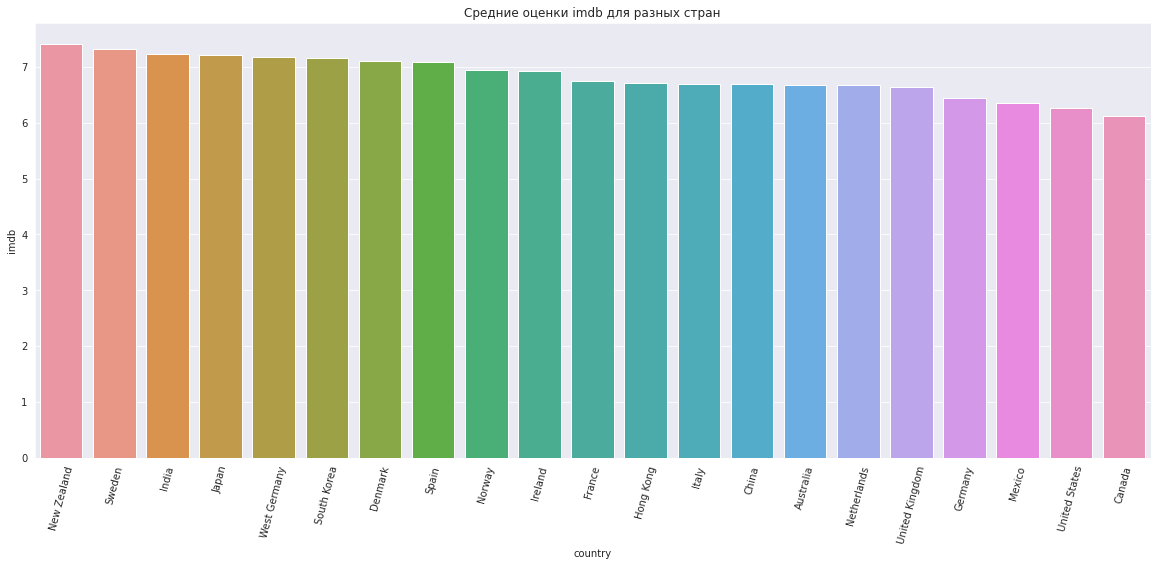

In [46]:
# построим график средних оценок imdb для разных стран


plt.figure(figsize=(20,8))
sns.barplot(df_country_imdb['country'], df_country_imdb['imdb'])
plt.xticks(rotation = 75)
plt.title('Средние оценки imdb для разных стран')
plt.show()

### Анализ возрастных рейтингов 

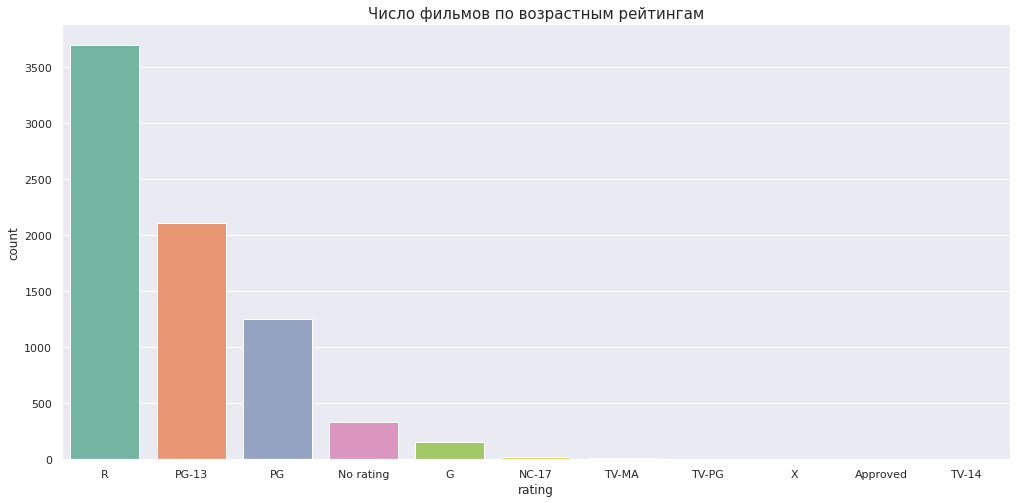

In [47]:
plt.figure(figsize=(17,8))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="Set2", order=df['rating'].value_counts().index[0:15])
plt.title('Число фильмов по возрастным рейтингам', fontsize=15)
plt.show()

- Больше всего за период с 1980 года было выпущено фильмов с рейтингом **R** - на такие картины лица, не достигшие 17-летнего возраста, допускаются только в сопровождении одного из родителей либо законного представителя;

- На втором месте фильмы с рейтингом **PG-13** - просмотр таких картин не желателен детям до 13 лет.

- На третьем месте по числу фильмов - картину с рейтигом **PG**. Детям рекомендуется смотреть такие фильмы с родителями.


### Анализ длительности фильмов

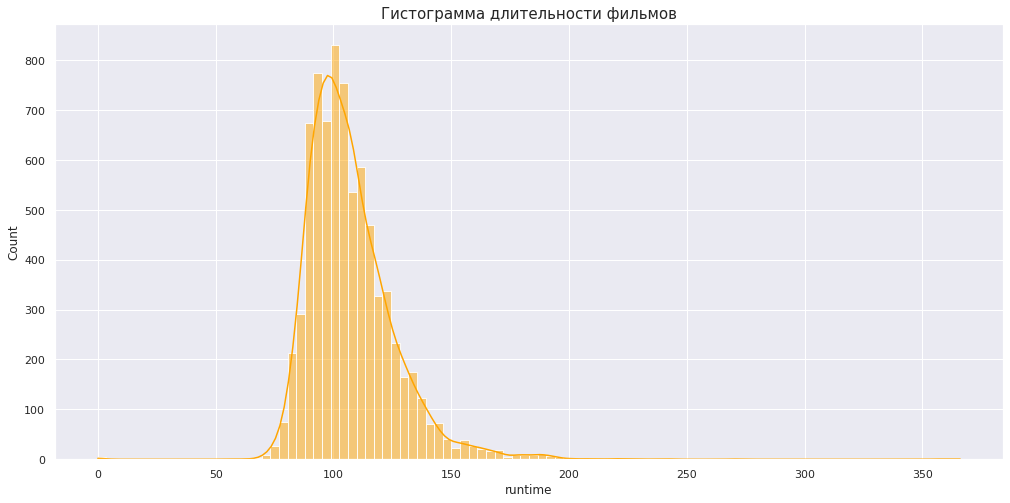

In [48]:
plt.figure(figsize=(17,8))
sns.histplot(df['runtime'], bins = 100, color = 'orange', label = 'Runtime', kde=True)
plt.title('Гистограмма длительности фильмов', fontsize=15)
plt.show()

In [49]:
df['runtime'].describe()

count    7668.000000
mean      107.205660
std        18.737179
min         0.000000
25%        95.000000
50%       104.000000
75%       116.000000
max       366.000000
Name: runtime, dtype: float64

In [50]:
# найдем самый длинный фильм с 1980 года
df.loc[df['runtime'] == df['runtime'].max()]


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gross_category
4396,The Best of Youth,R,Drama,2003,"June 20, 2003 (Italy)",8.5,21000,Marco Tullio Giordana,Sandro Petraglia,Luigi Lo Cascio,Italy,<NA>,2799773,BiBi Film,366,Низкий доход


In [51]:
# найдем самый короткий фильм с 1980 года

df.loc[(df['runtime'] > 0)].sort_values('runtime', ascending=True).head(1)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,gross_category
474,The Business of Show Business,NaN,History,1983,"February 15, 1983 (Canada)",8.3,79,Tom Logan,Tom Logan,NaN,Canada,323562,0,CTV,55,Нет информации о доходе


- Средняя продолжительность фильма с 1980 по 2020 гг. - 107 минут
- Самый длинный фильм  - драма Лучшие из молодых (The Best of Youth) 2003 года выпуска. Его продолжительность 366 минут - более 6 часов.
- Самый короткий фильм - Бизнес шоу-бизнеса (The Business of Show Business) 1983 года выпуска. Его продолжительность - 55 минут. 

### Корреляция длины фильмов и сборов

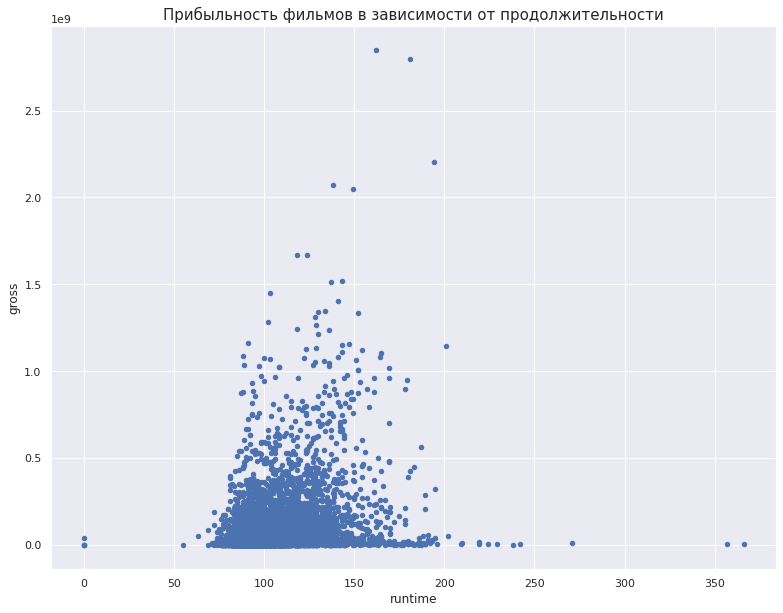

In [52]:
df.plot("runtime", "gross", kind='scatter', figsize=(13,10))
plt.title('Прибыльность фильмов в зависимости от продолжительности', fontsize=15)
plt.show()

### Режиссеры

Сгруппируем датасет по режиссерам. Посчитаем число снятых фильмов, средний рейтинг IMDB, общуюю прибыль и средний процент окупаемости.

In [61]:
# сгруппируем датасет по режиссерам, снявших более 1 фильма

df_director = df_roi.groupby('director').agg({'name':'count', 'score':'mean', 'gross':'sum', 'roi,%':'mean'})
df_director = df_director.rename(columns={'name':'count', 'score': 'avg_imdb'})
df_director = df_director[df_director['count']>1].reset_index()


In [62]:
# найдем самых окупаемых режиссеров из тех, кто снял более 5 картин

df_director_roi = df_director[df_director['count']>5].sort_values('roi,%', ascending=False).head(15).reset_index(drop=True)
df_director_roi

,director,count,avg_imdb,gross,"roi,%"
0,James Wan,9,6.966667,3710651018,2516.987444
1,Robert Rodriguez,13,5.692308,1266102239,2490.731308
2,Kevin Smith,11,6.654545,247143428,1644.376
3,Neil LaBute,8,6.025000,185037903,1503.73475
4,Darren Aronofsky,7,7.300000,804929352,1327.860429
5,John Hughes,8,6.950000,363377299,1015.390375
6,Hayao Miyazaki,6,8.100000,972337042,935.3405
7,Martha Coolidge,6,6.350000,111973420,922.556333
8,Amy Heckerling,6,6.100000,448586340,902.829333
9,Mike Newell,8,6.737500,1785236936,878.318625


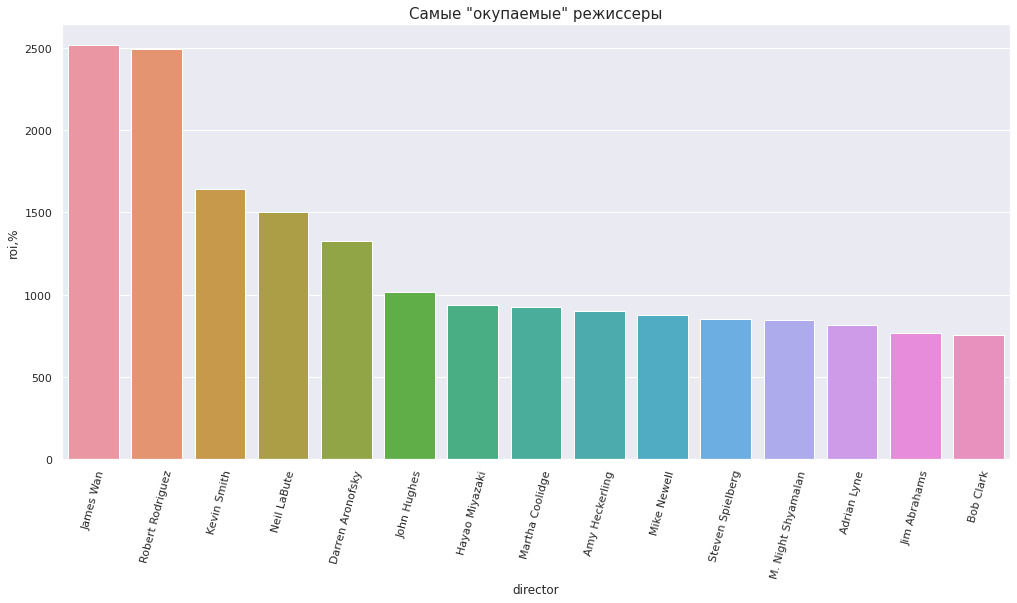

In [63]:
plt.figure(figsize=(17,8))
sns.barplot(x='director', y='roi,%', data=df_director_roi)
plt.title('Самые "окупаемые" режиссеры', fontsize=15)
plt.xticks(rotation = 75)
plt.show()

- Самый окупаемый режиссер - Джеймс Ван, известный съемками фильмов ужасов, таких как «Пила», «Астрал» и «Заклятие».

- На втором месте по окупаемости - Роберт Родригес. Он известен такими фильмами, как «Город грехов», «Отчаянный», «Четыре комнаты», «От заката до рассвета», «Факультет», «Мачете», а также серии фильмов «Дети шпионов», «Дети шпионов 2: Остров несбывшихся надежд», «Дети шпионов 3: Игра окончена» и «Дети шпионов 4D».

- На третьем месте - Кевин Смит. Он создатель кинокомпании «View Askew Productions», продюсирующей все его фильмы, а также автор комиксов. Известен такими фильмами, как «В погоне за Эми» и «Джей и Молчаливый Боб наносят ответный удар».


## Выводы: 


- Самый прибыльный фильм с 1980 по 2020 гг - "Аватар". Его доход составил 2,8 млрд долл.
На втором месте - "Мстители". Его сборы составили 2,7 млрд долл.
На третьем месте - "Титаник". Его доход составил 2,2 млрд долл.

- Самый прибыльный жанр - Action. Его доля составляет 41 % от общих доходов всего периода. На втором месте - Comedy. Его доля - 16%. Третье место за анимацией - 13 % сборов с 1980 года.

- В топ-5 стран по доходу от кино входит Новая Зеландия. Средняя оценка IMDB фильмов, произведенных в этой стране, составляет 7.42.

- Относительно высокая корреляция (0.75 - по коэффициенту Пирсона) выявлена между кассовыми сборами фильмов и их бюджетом. То есть фильмы, на производство которых затрачиваются большие средства, как правило, собирают большую кассу.

- На рынке студий нет студий, которые занимали бы существенную долю. Лидер рейтинга (Warner Bros.) самых прибыльных из них за весь период с 1980 года занимает 10% рынка, из чего можно сделать вывод, что этот рынок является конкурентным.

- Средняя продолжительность фильма с 1980 года - 107 минут
    - Самый длинный фильм  - драма Лучшие из молодых (The Best of Youth) 2003 года выпуска. Его продолжительность 366 минут.
    - Самый короткий фильм - Бизнес шоу-бизнеса (The Business of Show Business) 1983 года выпуска. Его продолжительность - 55 минут. 

- Больше всего фильмов за период с 1980 года было выпущено с рейтингом **R** - на такие картины лица, не достигшие 17-летнего возраста, допускаются только в сопровождении одного из родителей либо законного представителя.

- Самый окупаемый жанр - Horror. Средний показатель его окупаемости относительно вложенного бюджета составил более 7 тыс. процентов.

- Самым прибыльным фильмом относительно вложенных средств за период с 1980 по 2020 гг. стал фильм "Паранормальное явление" ("Paranormal Activity") 2007 года выпуска. Его производство обошлось в 15 тыс. долл., при этом прибыль составила более 193,3 млн долл.

- Самым убыточным фильмом относительно бюджета производства стала комедия "Троянская штучка" ("Trojan War") 1997 года выпуска. Бюджет на его производство составил 15 млн долл., а собрать в кинотеатрах ему удалось всего 309 долл.

- Самый окупаемый режиссер - Джеймс Ван, известный съемками фильмов ужасов, таких как «Пила», «Астрал» и «Заклятие».
